In [1]:
    import os
    
    train_path = r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\train"
    val_path = r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\valid"
    test_path = r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\test"
    
    
    subdirectories = [f.name for f in os.scandir(train_path) if f.is_dir()]
    
    print("Daftar Kelas:")
    for subdir in subdirectories:
        print(f">>> {subdir}")

Daftar Kelas:
>>> Baik
>>> Buruk


### Fungsi untuk Menampilkan Gambar Secara Acak

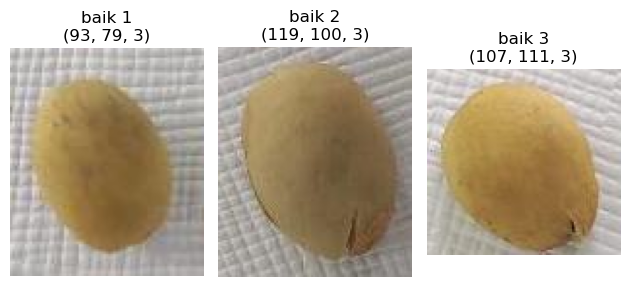

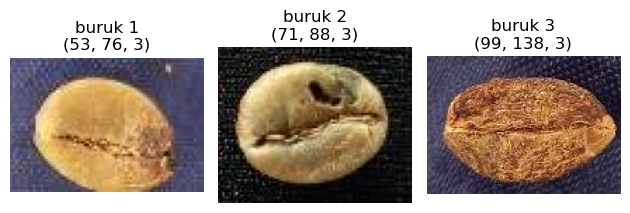

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# fungsi untuk menampilkan gambar secara acak pada grid n_row x n_col
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):
    
    # menentukan direktori gambar
    target_dir = data_dir + "/" + class_dir + "/"
     
    # memilih sebanyak n_row*n_col gambar secara acak
    rand_images = random.sample(os.listdir(target_dir), n_row*n_col)

    fig, axs = plt.subplots(n_row, n_col)

    # menampilkan gambar dalam bentuk grid ukuran n_row*n_col
    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# menampilkan contoh beberapa gambar acak dari direktori train
view_random_image(train_path, "baik", 1, 3)
view_random_image(train_path, "buruk", 1, 3)

### Memeriksa Ukuran dan Bentuk Gambar

In [7]:
def check_image_sizes(data_dir, class_dir):
    target_dir = data_dir + "/" + class_dir + "/"
    image_files = os.listdir(target_dir)
    sizes = []
    for image_file in image_files:
        img = mpimg.imread(target_dir + image_file)
        sizes.append(img.shape)
    return sizes

sizes_baik = check_image_sizes(train_path, "baik")
sizes_buruk = check_image_sizes(train_path, "buruk")

print(f"Ukuran gambar 'baik': {sizes_baik[:5]}")  # Menampilkan 5 ukuran pertama
print(f"Ukuran gambar 'buruk': {sizes_buruk[:5]}")


Ukuran gambar 'baik': [(122, 139, 3), (122, 139, 3), (139, 122, 3), (130, 103, 3), (130, 103, 3)]
Ukuran gambar 'buruk': [(105, 68, 3), (68, 105, 3), (105, 68, 3), (79, 95, 3), (79, 95, 3)]


 ### Distribusi Kelas dalam Dataset

  Pastikan distribusi antara kelas "baik" dan "buruk" cukup seimbang. Ketidakseimbangan kelas dapat menyebabkan model lebih cenderung mengklasifikasikan gambar ke kelas yang lebih dominan

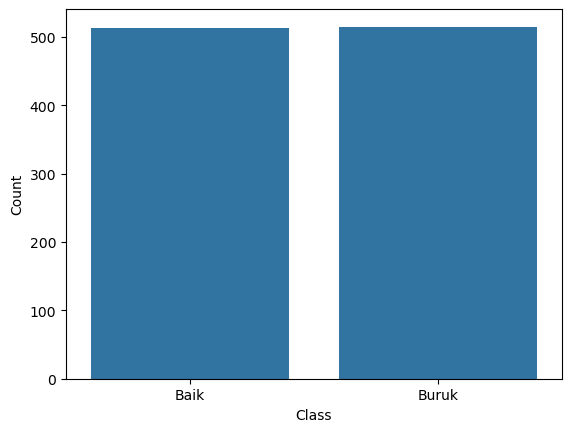

In [10]:
import seaborn as sns
import pandas as pd

def plot_class_distribution(data_dir):
    class_dirs = [f.name for f in os.scandir(data_dir) if f.is_dir()]
    class_counts = {}
    for class_dir in class_dirs:
        class_counts[class_dir] = len(os.listdir(data_dir + "/" + class_dir))
    
    class_df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])
    sns.barplot(x="Class", y="Count", data=class_df)
    plt.show()

plot_class_distribution(train_path)


## preprosessing 

## Edge detection membantu mendeteksi cacat seperti retakan.

Klasifikasi: Buruk


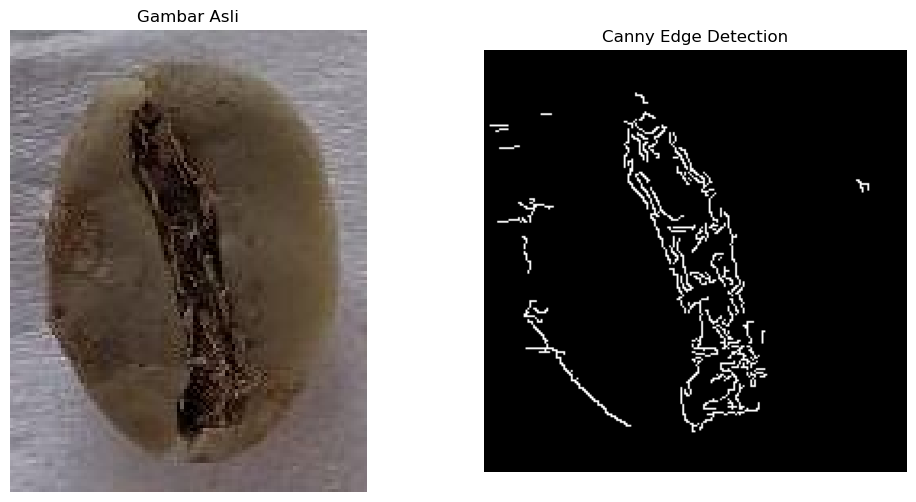

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Fungsi untuk Canny Edge Detection dan klasifikasi berdasarkan retakan
def classify_by_crack(image_path, threshold=1000):
    # Membaca gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Menyesuaikan ukuran gambar untuk memudahkan pemrosesan
    image = cv2.resize(image, (224, 224))
    
    # Menerapkan Canny Edge Detection
    edges = cv2.Canny(image, 100, 200)
    
    # Menghitung jumlah piksel yang terdeteksi sebagai tepi
    edge_count = np.sum(edges == 255)  # Piksel yang terdeteksi sebagai tepi adalah 255
    
    # Menentukan klasifikasi berdasarkan jumlah retakan
    if edge_count > threshold:
        classification = 'Buruk'  # Banyak retakan
    else:
        classification = 'Baik'   # Sedikit atau tidak ada retakan
    
    return classification, edges

# Contoh penggunaan fungsi
image_path =  r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\test\Baik\WhatsApp-Image-2024-11-22-at-08-47-06_251a198a_jpg.rf.f3b052cd385336d9ef41289ea1f05fdb.jpg"  # Ganti dengan path gambar biji kopi Anda
classification, edges = classify_by_crack(image_path)

# Menampilkan hasil
print(f"Klasifikasi: {classification}")

# Menampilkan gambar asli dan hasil deteksi tepi
image = cv2.imread(image_path)
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis('off')

# Gambar hasil edge detection (Canny)
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.show()


## Analisis Tekstur
### Metode: Local Binary Pattern (LBP)
LBP adalah metode untuk mengekstrak fitur tekstur dari citra. Fitur ini dapat digunakan untuk membedakan tekstur biji kopi yang baik dan buruk.
 untuk mendeteksi cacat pada material, mengenali pola permukaan, atau pengelompokan jenis bahan.

In [18]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply LBP
    lbp = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    
    # Compute the histogram of LBP
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    
    # Normalize histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    return hist


## Analisis Warna
### Metode: Color Histogram
Biji kopi "baik" dan "buruk" berdasarkan jurnal memiliki pola warna yang berbeda. Misalnya, biji kopi buruk mungkin memiliki warna yang tidak merata atau terlalu gelap.ggunakan(RGB).

In [23]:
def classify_by_color(image_path):
    # Membaca gambar
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize gambar
    
    # Konversi ke HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Histogram warna (H channel)
    hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    
    # Normalisasi histogram
    hist = cv2.normalize(hist, hist).flatten()
    
    # Ambang batas sederhana untuk klasifikasi
    mean_hue = np.mean(hist)
    if mean_hue < 50:  # Sesuaikan ambang batas
        classification = "Buruk"
    else:
        classification = "Baik"
    
    return classification


## Analisis Bentuk
### Metode: Kontur dan Analisis Bentuk (Shape Analysis)
Biji kopi buruk biasanya memiliki bentuk yang tidak teratur atau retakan besar yang memengaruhi struktur keseluruhannya.

Cara Implementasi:

Gunakan thresholding atau segmentasi untuk mendapatkan kontur objek.
Analisis fitur bentuk seperti:
Circularity: 
 #### 4𝜋 × Area / Perimeter^2 
Eccentricity: Bentuk elips biji kopi.

In [26]:
def classify_by_shape(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
    
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Ambil kontur terbesar (diasumsikan biji kopi)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Hitung circularity
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    circularity = 4 * np.pi * (area / (perimeter**2))
    
    if circularity < 0.8:  # Ambang batas circularity
        classification = "Buruk"
    else:
        classification = "Baik"
    
    return classification


### mengekstrak FITUR kemudian di Gabungkan 
mengekstrak berbagai fitur dari sebuah gambar untuk analisis atau klasifikasi. Fitur-fitur yang dihasilkan mencakup deteksi tepi, pola tekstur lokal, histogram warna, dan analisis bentuk. 

In [29]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def classify_coffee_quality(image_path):
    # Membaca gambar
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (224, 224))  # Resize gambar untuk konsistensi
    
    # 1. Klasifikasi berdasarkan retakan
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    edge_count = np.sum(edges == 255)
    crack_classification = "Buruk" if edge_count > 1000 else "Baik"
    
    # 2. Ekstraksi fitur LBP
    lbp = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    lbp_hist = lbp_hist.astype("float") / (lbp_hist.sum() + 1e-6)
    lbp_score = np.sum(lbp_hist[:30])  # Contoh sederhana: Gunakan histogram bagian awal untuk evaluasi
    
    # 3. Klasifikasi berdasarkan warna
    hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)
    color_hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()
    mean_hue = np.mean(color_hist)
    color_classification = "Buruk" if mean_hue < 50 else "Baik"
    
    # 4. Klasifikasi berdasarkan bentuk
    _, binary = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)
        circularity = 4 * np.pi * (area / (perimeter**2)) if perimeter != 0 else 0
        shape_classification = "Buruk" if circularity < 0.8 else "Baik"
    else:
        shape_classification = "Buruk"

    # Gabungkan hasil klasifikasi
    classifications = {
        "Crack": crack_classification,
        "Texture (LBP)": "Buruk" if lbp_score < 0.5 else "Baik",
        "Color": color_classification,
        "Shape": shape_classification,
    }
    
    # Final classification berdasarkan mayoritas
    final_classification = "Buruk" if list(classifications.values()).count("Buruk") > 2 else "Baik"
    
    return final_classification, classifications, edges, lbp

Klasifikasi Akhir: Baik
Detail Klasifikasi: {'Crack': 'Baik', 'Texture (LBP)': 'Baik', 'Color': 'Buruk', 'Shape': 'Buruk'}


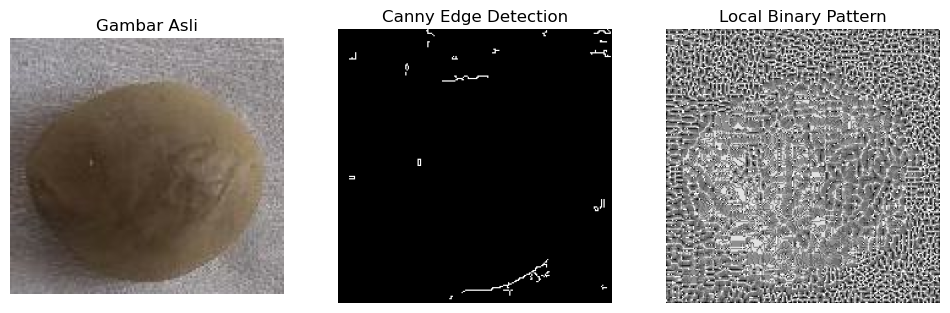

In [31]:
# Contoh penggunaan
image_path = r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\test\Baik\WhatsApp-Image-2024-11-22-at-08-47-37_957958a3_jpg.rf.66a494c81cbbfbd1e4bae06a3cf9e3c0.jpg"  # Ganti dengan path gambar biji kopi Anda
final_classification, details, edges, lbp = classify_coffee_quality(image_path)

# Menampilkan hasil
print(f"Klasifikasi Akhir: {final_classification}")
print(f"Detail Klasifikasi: {details}")

# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 3, 1)
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Perbaikan di sini
plt.title("Gambar Asli")
plt.axis('off')

# Gambar hasil deteksi tepi (Canny)
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Gambar LBP
plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title("Local Binary Pattern")
plt.axis('off')

plt.show()

### Visualisasi Statistik dari Citra
Statistik Warna: Cek distribusi warna dari gambar dalam dataset untuk memverifikasi apakah ada variasi warna yang signifikan di antara kelas-kelas tersebut. Anda bisa menggunakan histogram untuk memvisualisasikan distribusi warna.
guna nya untuk 
menampilkan histogram warna dari sebuah gambar dalam ruang warna HSV (Hue, Saturation, Value). Histogram warna ini memberikan informasi tentang distribusi intensitas warna pada gambar, yang sering digunakan dalam analisis visual, klasifikasi gambar, atau evaluasi karakteristik warna objek.


Hue adalah representasi dari jenis warna dalam spektrum, seperti merah, kuning, hijau, biru, dan sebagainya.


Saturation menunjukkan intensitas atau kepekatan warna. Nilai tinggi berarti warna yang lebih cerah dan murni, sedangkan nilai rendah berarti warna yang lebih pudar atau mendekati abu-abu.


Value menunjukkan tingkat kecerahan warna. Semakin tinggi nilai Value, semakin terang warna tersebut.


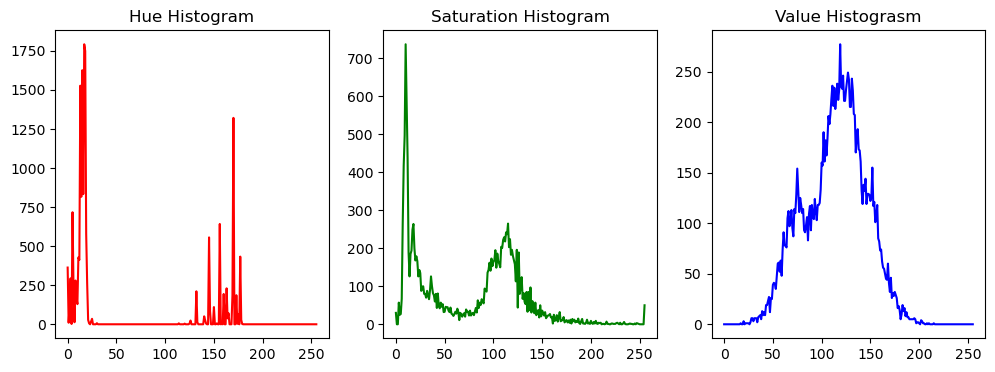

In [36]:
def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue_hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    saturation_hist = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    value_hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(hue_hist, color='r')
    plt.title('Hue Histogram')
    plt.subplot(1, 3, 2)
    plt.plot(saturation_hist, color='g')
    plt.title('Saturation Histogram')
    plt.subplot(1, 3, 3)
    plt.plot(value_hist, color='b')
    plt.title('Value Histograsm')
    plt.show()

# Menampilkan histogram warna gambar pertama dari kelas 'baik'
first_good_image = os.path.join(train_path, "baik", os.listdir(os.path.join(train_path, "baik"))[0])
plot_color_histogram(first_good_image)


## Membangun Model cnn 

membuat sebuah model dengan arsitektur cnn DenseNet121, sebagai model  sebagai feature extractor 

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


## DenseNet121 dengan Transfer Learning
 menggunakan transfer learning untuk DenseNet121 dan membangun model CNN sederhana untuk klasifikasi.

In [45]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Fungsi untuk membuat model DenseNet121
def create_densenet_model(input_shape=(224, 224, 3), num_classes=2):
    # Load DenseNet121 tanpa top layers
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Membekukan layer base model
    base_model.trainable = False

    # Menambahkan custom top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout untuk regularisasi
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile model
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Membuat model
densenet_model = create_densenet_model()

# Menampilkan arsitektur model
densenet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,039,554 (26.85 MB)

 Trainable params: 2,050 (8.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

## Menyiapkan dataset menggunakan ImageDataGenerator dengan augmentasi yang sesuai.

In [52]:
# Image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\valid",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\pasar\Machine Learning\NEW\Prediksi Biji dataset\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1028 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## Melatih Model
DenseNet121,

In [54]:
history_densenet = densenet_model.fit(
    train_generator, #menyediakan data pelatihan
    epochs=10, ## model akan dilatih pada seluruh data pelatihan.
    validation_data=validation_generator #objek yang menyediakan data untuk validasi selama pelatihan.
)


Epoch 1/10


C:\Users\pasar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.4770 - loss: 1.2780 - val_accuracy: 0.4800 - val_loss: 0.7880
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5029 - loss: 1.0970 - val_accuracy: 0.6100 - val_loss: 0.6606
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.5345 - loss: 0.9875 - val_accuracy: 0.7000 - val_loss: 0.5755
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5937 - loss: 0.8830 - val_accuracy: 0.8200 - val_loss: 0.4905
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6103 - loss: 0.7726 - val_accuracy: 0.8400 - val_loss: 0.4287
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6260 - loss: 0.7342 - val_accuracy: 0.8400 - val_loss: 0.3818
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6987 - loss: 0.6267 - val_accuracy: 0.8400 - val_loss: 0.3480
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.7315 - loss: 0.5771 - val_accuracy: 0.8600 - val_loss: 0.3148
Ep

## Menghitung Akurasi Model

In [57]:
# Evaluasi model
test_loss, test_accuracy = densenet_model.evaluate(validation_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9110 - loss: 0.2704
Test Accuracy: 90.00%


## Membuat Prediks

In [60]:
import numpy as np

# Membuat prediksi
y_pred = densenet_model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi
y_true = validation_generator.classes        # Label sebenarnya


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step


## Membuat Confusion Matrix

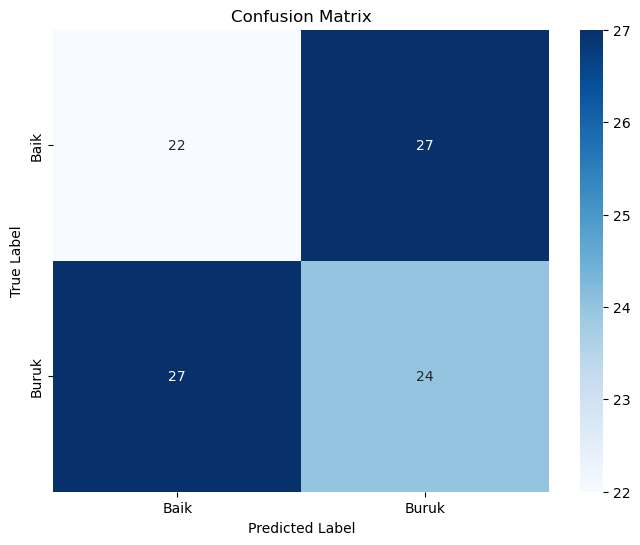

              precision    recall  f1-score   support

        Baik       0.45      0.45      0.45        49
       Buruk       0.47      0.47      0.47        51

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100



In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
print(report)


recision (Presisi):

Precision mengukur seberapa banyak prediksi model yang benar dari seluruh prediksi positif yang dibuat oleh model.
Formula: Precision = TP / (TP + FP)
TP = True Positives (Benar untuk kelas yang diprediksi)
FP = False Positives (Salah untuk kelas yang diprediksi)
Precision rendah (sekitar 0.45-0.47) menunjukkan bahwa model Anda sering membuat prediksi yang salah untuk kelas "Baik" dan "Buruk".
Recall (Sensitivitas atau True Positive Rate):

Recall mengukur seberapa banyak contoh positif yang berhasil diprediksi oleh model dibandingkan dengan seluruh contoh yang benar-benar positif.
Formula: Recall = TP / (TP + FN)
FN = False Negatives (Yang seharusnya positif, tetapi diprediksi negatif)
Recall yang rendah (sekitar 0.45-0.47) menunjukkan bahwa model Anda gagal menangkap sebagian besar data yang seharusnya masuk dalam kategori positif.
F1-Score:

F1-Score adalah rata-rata harmonik dari precision dan recall, memberikan gambaran umum dari keseimbangan keduanya.
Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1-Score yang sekitar 0.45 menunjukkan bahwa model Anda tidak seimbang antara precision dan recall.
Support:

Ini menunjukkan jumlah contoh sebenarnya dalam dataset untuk masing-masing kelas (misalnya, 49 untuk "Baik" dan 51 untuk "Buruk").
Akurasi:

Akurasi sebesar 0.46 menunjukkan bahwa secara keseluruhan model memprediksi dengan benar sekitar 46% dari waktu.

## Optimasi Arsitektur Model (Hyperparameter Tuning)


Mendefinisikan Model dengan Hyperparameter

In [67]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

# Fungsi untuk mendefinisikan model
def build_model(hp):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model first

    # Model
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    
    # Tuning jumlah unit di layer Dense
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu'))
    
    # Menambahkan dropout layer dengan rate yang bisa diatur
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(layers.Dense(2, activation='softmax'))  # 2 kelas (Baik dan Buruk)

    # Menentukan optimizer dengan learning rate yang dapat diatur
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


## 5. Mendefinisikan Tuner:
Untuk mencari kombinasi hyperparameter terbaik, kita menggunakan RandomSearch atau Hyperband. Kita akan menggunakan RandomSearch di sini.

In [71]:
# Definisikan tuner
tuner = kt.RandomSearch(
    build_model,  # Model yang akan di-tune
    objective='val_accuracy',  # Target yang ingin dioptimasi
    max_trials=5,  # Banyaknya percobaan tuning
    executions_per_trial=1,  # Percobaan setiap trial
    directory='my_dir',  # Direktori untuk menyimpan hasil tuning
    project_name='densenet_tuning'  # Nama project
)


## Menjalankan Hyperparameter Tuning:
Setelah tuner didefinisikan, kita dapat mulai menjalankan tuning dan mengatur parameter yang relevan.



In [74]:
# Menjalankan hyperparameter tuning
tuner.search(
    train_generator,  # Generator untuk data latih
    epochs=10,  # Jumlah epoch untuk setiap trial
    validation_data=validation_generator  # Data validasi
)


Trial 3 Complete [00h 17m 29s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 45m 56s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
512               |128               |dense_units
0.4               |0.4               |dropout_rate
0.00085473        |0.00050428        |learning_rate

Epoch 1/10



KeyboardInterrupt



In [ ]:
# Mendapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluasi model terbaik pada data validasi
val_loss, val_acc = best_model.evaluate(validation_generator)
print(f"Best Validation Accuracy: {val_acc}")


## Melakukan Fine-Tuning:
Setelah mendapatkan model terbaik, Anda bisa melakukan fine-tuning dengan melatih beberapa layer dari DenseNet121 yang sebelumnya dibekukan

In [ ]:
# Melakukan fine-tuning dengan membuka lebih banyak layer dari base model
base_model.trainable = True
for layer in base_model.layers[:100]:  # Melatih layer lebih dalam
    layer.trainable = False

# Mengkompilasi model ulang dengan learning rate lebih rendah
best_model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Learning rate kecil untuk fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Melatih model dengan fine-tuning
history = best_model.fit(
    train_generator,
    epochs=10,  # Fine-tuning untuk 10 epoch tambahan
    validation_data=validation_generator
)


Evaluasi Akhir 

## confusiton matriks nya

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load dataset uji
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Jangan di-shuffle untuk memastikan urutan label sesuai
)

# Prediksi pada dataset uji
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Konversi probabilitas menjadi label

# Label sebenarnya dari dataset uji
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
